In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale

df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/FITNESS_결측.csv', encoding='euc-kr')
#df_raw

In [10]:
df_raw.isnull().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [11]:
df_raw.isna().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [12]:
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [13]:
df_raw["GENDER"].fillna("여성", inplace=True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [14]:
df_raw.groupby("GENDER")["WEIGHT"].agg("mean")

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [16]:
df_raw["WEIGHT"] = \
df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


<AxesSubplot:>

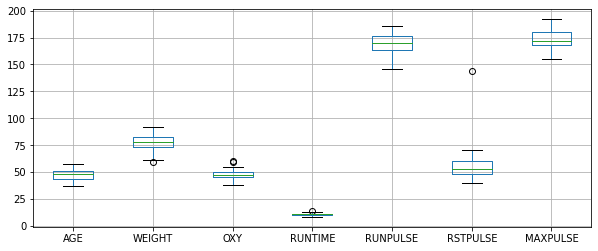

In [17]:
df_raw.boxplot(figsize = (10, 4))

In [18]:
df_raw["RSTPULSE"] >= 100
df_raw.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176


In [19]:
df_fitness = df_raw[df_raw["RSTPULSE"] < 100]
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [23]:
df_fitness_num = df_fitness.select_dtypes(exclude = 'object')
df_fitness_num.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [27]:
df_scale_std = scale(df_fitness_num)
df_scale_std = pd.DataFrame(df_scale_std, columns=df_fitness_num.columns)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.805985,-1.119445,2.334717,-1.771826,-0.361066,-1.856653,-0.200185
1,-1.506841,0.606869,2.429494,-1.423469,0.029276,-0.777726,1.328503
2,-0.630771,1.106393,1.301962,-1.408323,-1.336919,-1.182324,-0.636953
3,0.595728,-0.777202,1.366191,-1.203852,-2.312773,-0.777726,-2.056450
4,0.420514,0.677708,0.295251,-1.181133,1.005129,-1.317190,1.219311


In [30]:
df_scale_minmax = minmax_scale(df_fitness_num)
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns=df_fitness_num.columns)
df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000
4,0.60,0.717450,0.519169,0.133106,0.85,0.133333,0.810811


In [32]:
df_scale_desc = df_scale_minmax.describe()
df_scale_desc

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.480000,0.551977,0.452651,0.399261,0.592500,0.458889,0.509009
std,0.290244,0.248339,0.229145,0.229191,0.260566,0.251384,0.251750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,0.431183,0.343175,0.261945,0.412500,0.266667,0.351351
50%,0.525000,0.547005,0.425089,0.380546,0.600000,0.416667,0.459459
75%,0.700000,0.717450,0.567852,0.509812,0.750000,0.625000,0.675676
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df_scale_robust = robust_scale(df_fitness_num)
df_scale_robust = pd.DataFrame(df_scale_robust, columns=df_fitness_num.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.6875,-0.937433,2.463797,-1.535284,-0.296296,-1.162791,0.000000
1,-1.1875,0.534986,2.558834,-1.218589,0.000000,-0.418605,1.166667
2,-0.5625,0.961043,1.428207,-1.204819,-1.037037,-0.697674,-0.333333
3,0.3125,-0.645525,1.492612,-1.018933,-1.777778,-0.418605,-1.416667
4,0.1875,0.595407,0.418733,-0.998279,0.740741,-0.790698,1.083333


In [35]:
df_scale_desc = df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.582,2.559,2.499,1.185,1.628,1.667


In [36]:
df_rstpulse = pd.DataFrame()
df_rstpulse["Raw"] = df_fitness_num["RSTPULSE"]
df_rstpulse["Standard"] = df_scale_std["RSTPULSE"]
df_rstpulse["MinMax"] = df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"] = df_scale_robust["RSTPULSE"]
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [37]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,29.000,29.000,29.000
mean,53.767,-0.043,0.448,0.088
std,7.542,1.007,0.249,0.695
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.238,0.400,-0.047
75%,58.750,0.571,0.600,0.512
max,70.000,2.189,1.000,1.628


array([[<AxesSubplot:title={'center':'Raw'}>,
        <AxesSubplot:title={'center':'Standard'}>],
       [<AxesSubplot:title={'center':'MinMax'}>,
        <AxesSubplot:title={'center':'Robust'}>]], dtype=object)

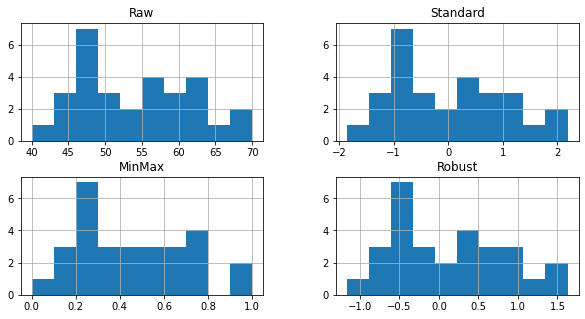

In [39]:
df_rstpulse[["Raw", "Standard", "MinMax", "Robust"]].hist(figsize = (10,5))

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rc('font',family='NanumGothic')
matplotlib.rc('axes', unicode_minus=False)

In [52]:
df_fitness = pd.read_csv("/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/FITNESS.csv", encoding='euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [54]:
df_currency = pd.read_csv("/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/환율.csv", encoding='euc-kr')
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,20160101,181.48,0.1541
1,JPY,20160101,976.99,0.8294
2,USD,20160101,1178.00,1.0000
3,CNY,20160102,181.48,0.1541
4,JPY,20160102,976.99,0.8294


In [58]:
df_fitness = pd.read_csv("/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/FITNESS.csv", encoding='euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


<AxesSubplot:>

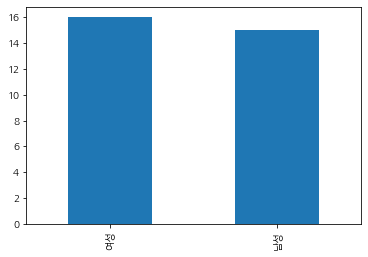

In [59]:
df_count = df_fitness["GENDER"].value_counts()
df_count.plot.bar()

<AxesSubplot:>

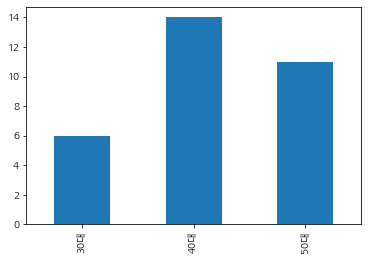

In [60]:
df_count = df_fitness["AGEGROUP"].value_counts()
df_count.sort_index(inplace=True)
df_count.plot.bar()

<AxesSubplot:xlabel='GENDER,AGEGROUP'>

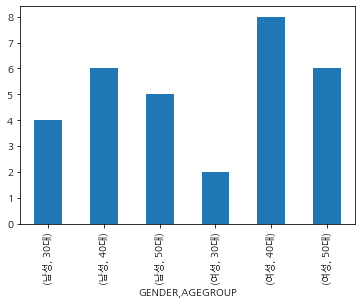

In [63]:
df_groupby_total = df_fitness.groupby(["GENDER","AGEGROUP"]).size()
df_groupby_total.plot.bar()

In [64]:
df_fitness = pd.read_csv("/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/FITNESS.csv", encoding='euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


<AxesSubplot:>

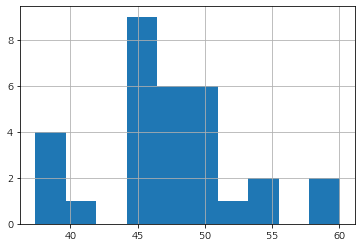

In [65]:
df_fitness["OXY"].hist()

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'WEIGHT'}>,
        <AxesSubplot:title={'center':'OXY'}>],
       [<AxesSubplot:title={'center':'RUNTIME'}>,
        <AxesSubplot:title={'center':'RUNPULSE'}>,
        <AxesSubplot:title={'center':'RSTPULSE'}>],
       [<AxesSubplot:title={'center':'MAXPULSE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

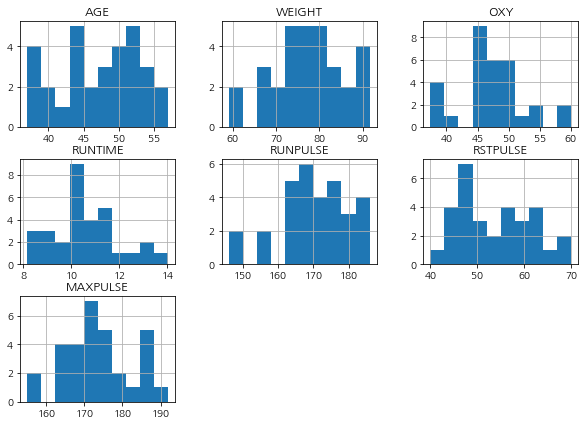

In [66]:
df_fitness.hist(figsize = (10, 7))

array([<AxesSubplot:title={'center':'남성'}>,
       <AxesSubplot:title={'center':'여성'}>], dtype=object)

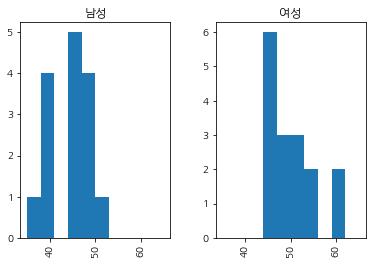

In [67]:
df_fitness.hist(column="OXY", by="GENDER", range=(35, 65))

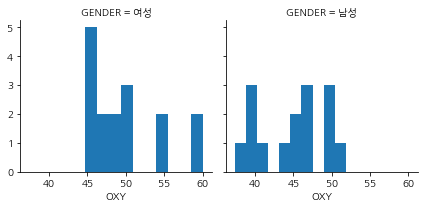

In [68]:
grid = sns.FacetGrid(df_fitness, col="GENDER")
grid.map(plt.hist, "OXY")

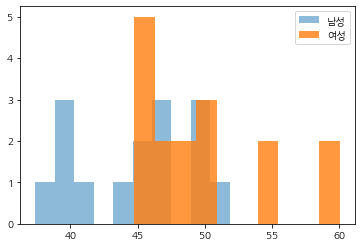

In [72]:
plt.hist(df_fitness[df_fitness["GENDER"] == "남성"]["OXY"],label="남성", alpha=0.5)
plt.hist(df_fitness[df_fitness["GENDER"] == "여성"]["OXY"],label="여성", alpha=0.8)
plt.legend()

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <BarContainer object of 10 artists>)

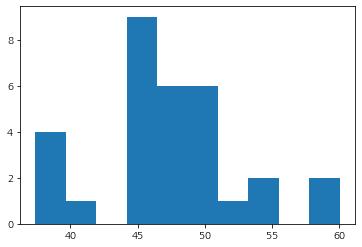

In [70]:
plt.hist(x="OXY",data=df_fitness)

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <BarContainer object of 20 artists>)

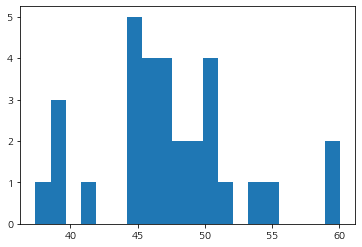

In [71]:
plt.hist(x="OXY", data = df_fitness, bins=20)

In [73]:
df_fitness = pd.read_csv("/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/FITNESS.csv", encoding='euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


<AxesSubplot:title={'center':'OXY'}, xlabel='[GENDER, AGEGROUP]'>

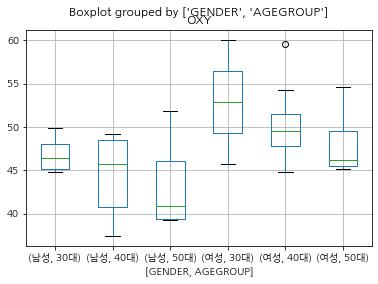

In [74]:
df_fitness.boxplot(column="OXY", by=["GENDER", "AGEGROUP"])

<AxesSubplot:ylabel='None'>

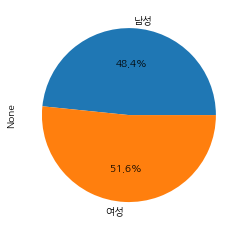

In [75]:
df_count = df_fitness.groupby(["GENDER"]).size()
df_count.plot.pie(y="OXY", autopct="%.1f%%")

<AxesSubplot:ylabel='None'>

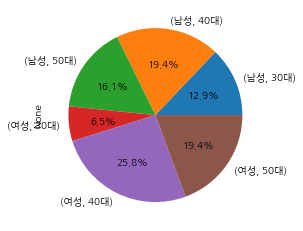

In [76]:
df_count = df_fitness.groupby(["GENDER", "AGEGROUP"]).size()
df_count.plot.pie(y="OXY", autopct="%.1f%%df_fitness = pd.read_csv("/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/FITNESS.csv", encoding='euc-kr')
df_fitness.head()")

<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

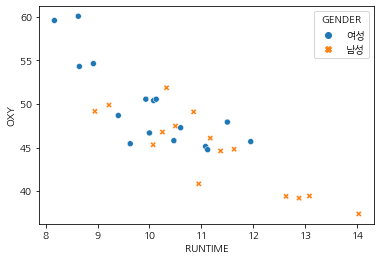

In [77]:
sns.scatterplot(x="RUNTIME", y="OXY", hue="GENDER", style="GENDER", data=df_fitness)

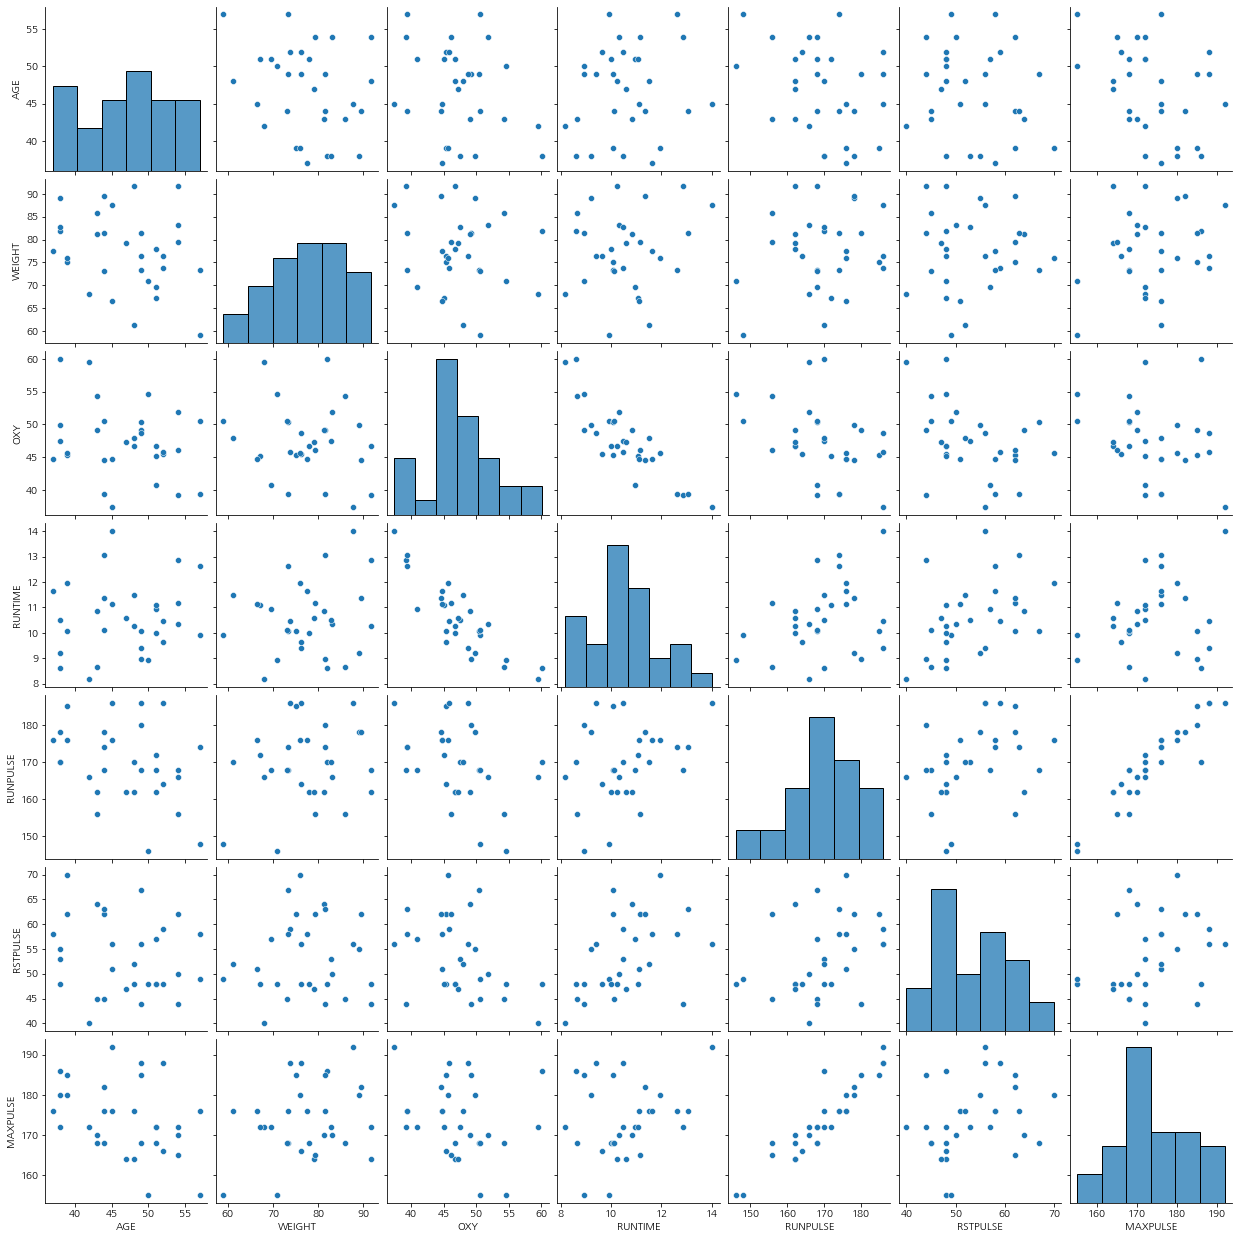

In [78]:
sns.pairplot(df_fitness)

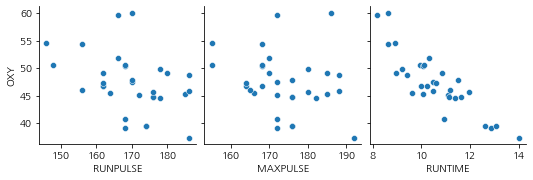

In [79]:
sns.pairplot(df_fitness, y_vars=["OXY"], x_vars=["RUNPULSE", "MAXPULSE", "RUNTIME"])

In [85]:
df_currency = pd.read_csv("/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/환율.csv", encoding='euc-kr')
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,20160101,181.48,0.1541
1,JPY,20160101,976.99,0.8294
2,USD,20160101,1178.00,1.0000
3,CNY,20160102,181.48,0.1541
4,JPY,20160102,976.99,0.8294


In [87]:
df_currency_pivot = df_currency.pivot(index="APPL_DATE", columns="CURRENCY", values="STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
20160101,181.48,976.99,1178.0
20160102,181.48,976.99,1178.0
20160103,181.48,976.99,1178.0
20160104,181.10,992.62,1184.0
20160105,181.94,993.00,1185.0


<AxesSubplot:xlabel='APPL_DATE'>

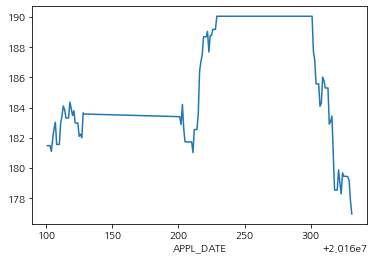

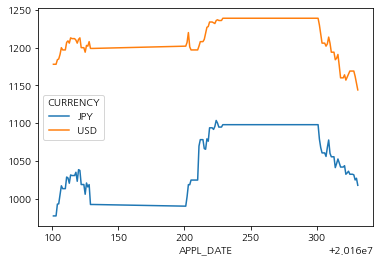

In [88]:
df_currency_pivot["CNY"].plot()
df_currency_pivot[["JPY", "USD"]].plot()

In [96]:
df_fitness = pd.read_csv("/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/FITNESS.csv", encoding='euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [97]:
df_agg = df_fitness.groupby(["GENDER", "AGEGROUP"]).agg("mean")
df_pivot = df_agg.pivot("GENDER", "AGEGROUP", "OXY")
sns.heatmap(df_pivot, cmap="Blues")

KeyError: 'GENDER'

In [98]:
df_fitness = pd.read_csv("/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/FITNESS.csv", encoding='euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


<AxesSubplot:>

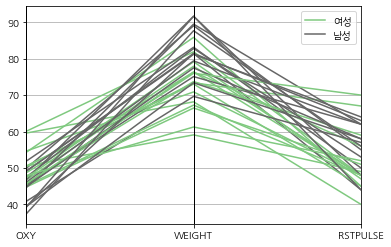

In [99]:
pd.plotting.parallel_coordinates(df_fitness, "GENDER", cols=["OXY", "WEIGHT", "RSTPULSE"], colormap="Accent")

<AxesSubplot:>

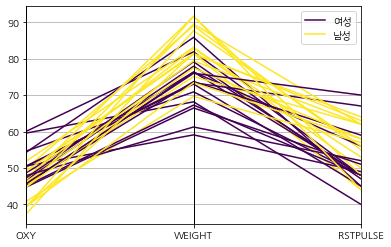

In [100]:
pd.plotting.parallel_coordinates(df_fitness, "GENDER", cols=["OXY", "WEIGHT", "RSTPULSE"], colormap="viridis")

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse

In [108]:
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/체질검사.csv', encoding='euc-kr')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


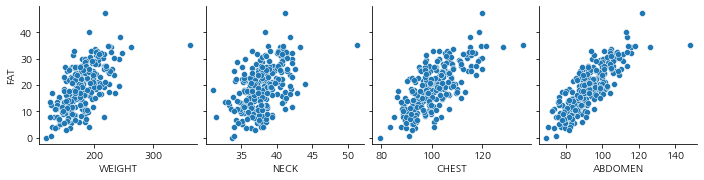

In [109]:
sns.pairplot(df_raw, y_vars="FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN"])

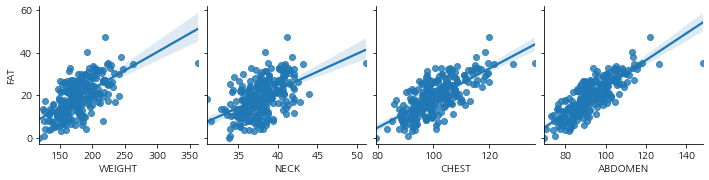

In [110]:
sns.pairplot(df_raw, y_vars="FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN"], kind='reg')

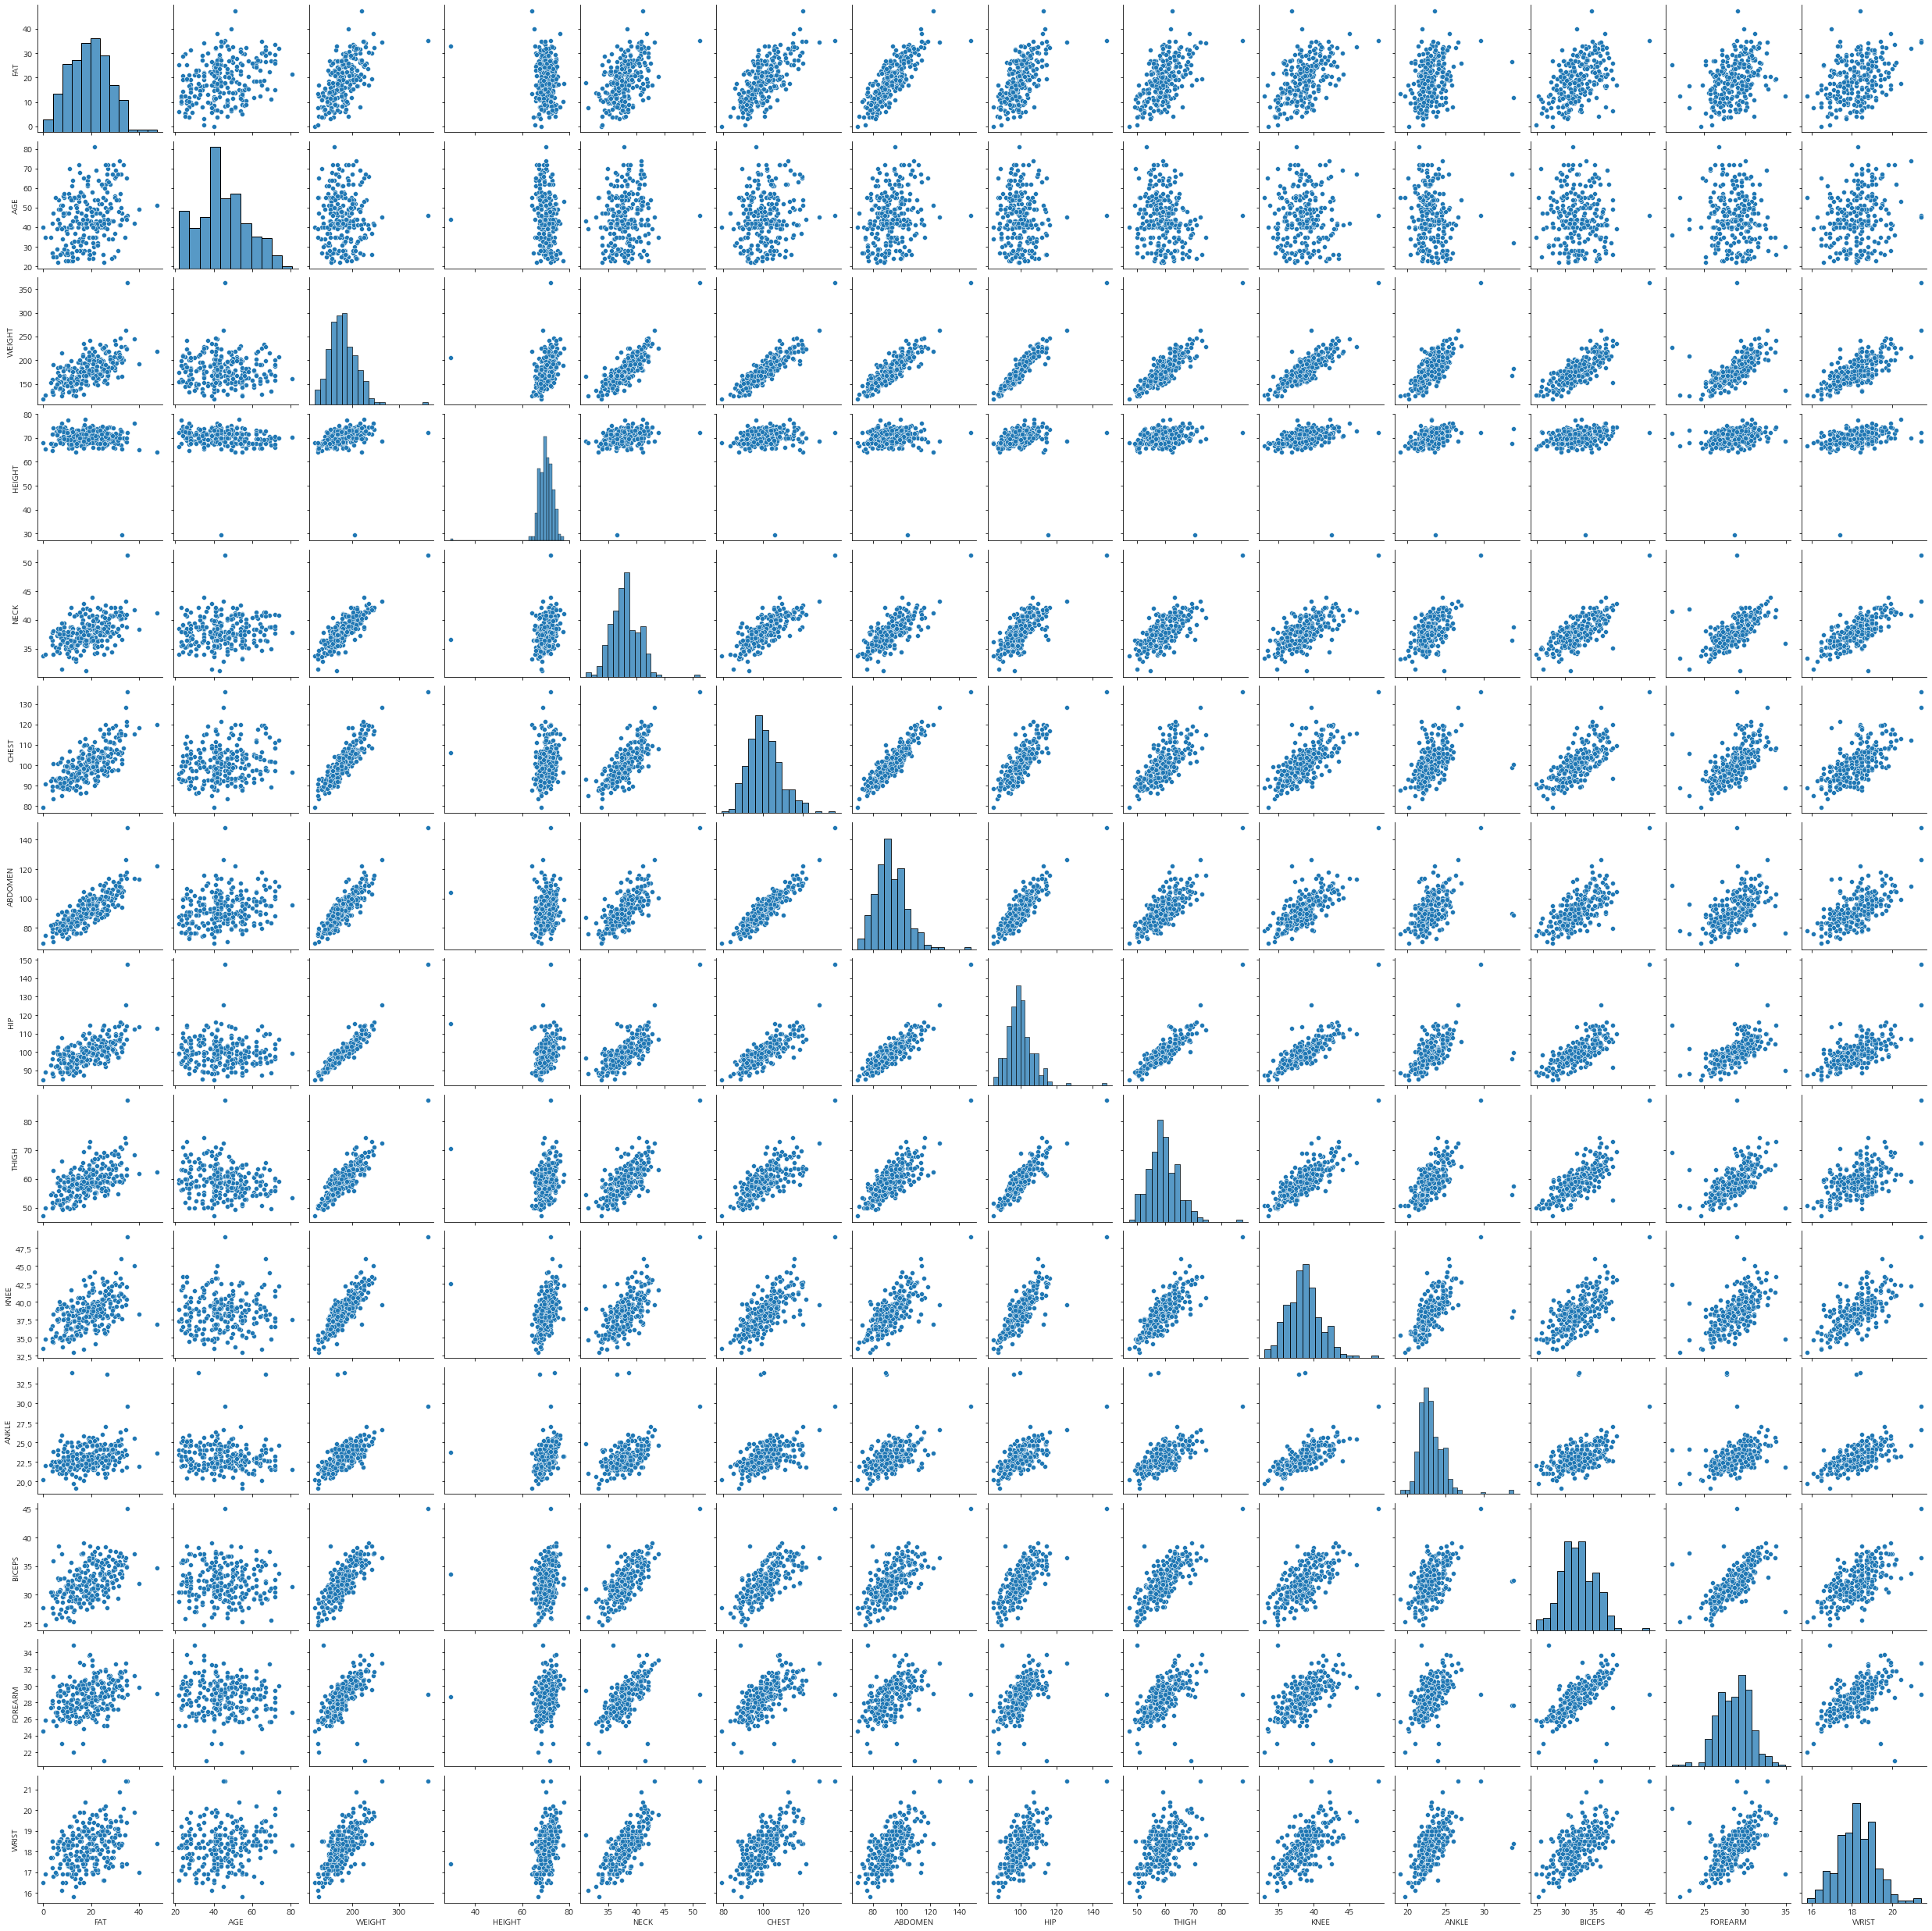

In [111]:
sns.pairplot(df_raw)

In [112]:
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


In [113]:
reg_model = smf.ols(formula="FAT-AGE+WEIGHT+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+\
                            KNEE+ANKLE+BICEPS+FOREARM+WRIST", data=df_raw)

PatsyError: model is missing required outcome variables